# Project 1 - Quality control for a clock manufacturing company [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

There is an imaginary clock manufacturing company that wants you to develop software to check the quality of its products. The clocks produced by this company have **two hands**:

- the small hand is **red** and indicates the **hour**,
- the long hand is **green** and indicates the minutes.

We refer to these as *the hour hand* and *the minute hand* respectively. These clocks do not have any other hands (although some other clocks have a third hand indicating the seconds).

It is very important for these hands to be properly aligned. For example, if the hour hand is pointing to the hour `3` (being horizontal and pointing toward right), the minute hand should be pointing toward the hour `12` (vertical and pointing upward). Another example is when the hour hand is pointing to the hour `1:30` (making a 45 degree angle from the vertical line), the minute hand should be pointing toward hour `6` (vertical and downward).

| Correct `1:30`, the hour hand is halfway between 1 and 2. | Incorrect `1.30`, the hour hand is too close to 1. |
|:--:|:--:|
| ![Correct 1.30](graphics/one_thirty_correct.png) | ![Incorrect 1.30](graphics/one_thirty_incorrect.png) |

Due to production imprecisions, this is not the case all the time. Your software package will **quantify the potential misalignments** and help the company to return the faulty clocks back to the production line for re-adjustment.

You will achieve this goal in several steps during this project. Most steps can be done independently. Therefore, if you are struggling with one part, you can move on to other tasks and gain the marks allocated to them.

For most tasks, under "✅ *Testing:*", you will be given instructions on how to check that your function works as it should, even if you haven't done the previous task.


---

## Task 1: Reading images into NumPy arrays [3 marks]

The company takes a picture of each clock, and saves it as a PNG image of 101x101 pixels. The folder `clock_images` contains the photos of all the clocks you need to control today.

In a PNG colour image, the colour of each pixel can be represented by 3 numbers between 0 and 1, indicating respectively the amount of **red**, the amount of **green**, and the amount of **blue** needed to make this colour. This is why we refer to colour images as **RGB** images.

- If all 3 values are 0, the pixel is black.
- If all 3 values are 1, the pixel is white.
- If all 3 values are the same, the pixel is grey. The smaller the values, the darker it is.
- Different amounts of red, green, and blue correspond to different colours.

For example, select a few colours [using this tool](https://doc.instantreality.org/tools/color_calculator/), and check the RGB values for that colour in the *RGB Normalized decimal* box. You should see that, for instance, to make yellow, we need a high value of red, a high value of green, and a low value of blue.

If you'd like more information, [this page](https://web.stanford.edu/class/cs101/image-1-introduction.html) presents a good summary about RGB images.

---

🚩 Study the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) for the functions `imread()` and `imshow()` from `matplotlib.pyplot`. Then, write code below to read the `clock_0` image from `batch_0` into a NumPy array, and display the image.

You will obtain a NumPy array with shape `(101, 101, 3)`, i.e. an array which is 3 layers deep. Each of these layers is a 101x101 array, where the elements represent the intensity of red, green, and blue respectively, for each pixel. For example, the element of this array with index `[40, 20, 2]` corresponds to the amount of blue in the pixel located in row 40, column 20.

Create a second figure, with 3 sets of axes, and use `imshow()` to display each layer separately on its own set of axes. Label your figures appropriately to clearly indicate what each image is showing.

*Note: you can use `ax.imshow()` to display an image on the axes `ax`, the same way we use `ax.plot()`.*

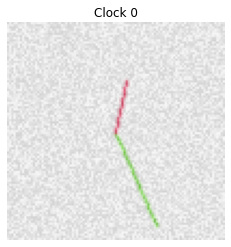

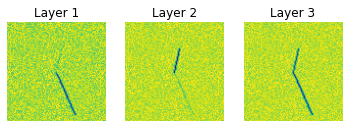

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## creat the first picture
image_0 = plt.imread("clock_images/batch_0/clock_0.png") # read the clock_0 as a array
fig, ax = plt.subplots() 
plt.imshow(image_0) # transform RGB array back into image
ax.set_title("Clock 0") # set the title of image
ax.axis('off') # turn off the axis

plt.show()

## creat the second figure
fig, ax = plt.subplots(1, 3)
layer_1 = np.array(image_0[:, :, 0]) # get the RGB array for layer 1
ax[0].imshow(layer_1) # display layer 1
# set the information of fig1
ax[0].set_title("Layer 1")
ax[0].axis('off')

layer_2 = np.array(image_0[:, :, 1]) # get the RGB array for layer 2
ax[1].imshow(layer_2) # display layer 2
# set the information of fig1
ax[1].set_title("Layer 2")
ax[1].axis('off')

layer_3 = np.array(image_0[:, :, 2]) # get the RGB array for layer 3
ax[2].imshow(layer_3) # display layer 3
# set the information of fig1
ax[2].set_title("Layer 3")
ax[2].axis('off')

plt.show()

---
## Task 2: Clean up the images to extract data [6 marks]

Later in Task 3, we will use **linear regression** to find the exact position of both clock hands. To perform linear regression, we will need the **coordinates of the pixels** belonging to each hand; then, we will be able to fit a line through these pixels.

This task is concerned with extracting the correct pixel coordinates from the image.

---

🚩 Write a function `get_clock_hands(clock_RGB)`, which takes one input argument `clock_RGB`, a NumPy array of size 101x101x3 representing an RGB image of a clock, and returns 2 NumPy arrays with 2 columns each, such that:

- In the first array, each row corresponds to the `[row, column]` index of a pixel belonging to the **hour hand**.
- In the second array, each row corresponds to the `[row, column]` index of a pixel belonging the **minute hand**.

The goal is to obtain, for each hand, a collection of `[row, column]` coordinates which indicate where on the picture is the clock hand. You will need to figure out a way to decide whether a given pixel belongs to the hour hand, the minute hand, or neither.


---

***Important note:*** the pictures all contain some amount of noise and blur. Depending on how you decide to count a certain pixel or not as part of a clock hand, your function will pick up different pixels. There isn't just one possible set of pixel coordinates to pick up for a given image -- the most important thing is that the pixels you extract **only** belong to one of the two hands, and not to the background for example. This will ensure that you can use linear regression efficiently.

---

✅ *Testing:* For example, for the tiny 7x7 clock below (a 7x7 pixel image is available in the `testing` folder for you to try your function):

| Clock | Hour hand | Minute hand |
|:--:|:--:|:--:|
| <img src="graphics/task2.png" alt="Task 2 example" style="width: 100px;"/> | [[1, 1]<br/> [2, 2]] | [[3, 3]<br/> [4, 3]<br/> [4, 4]<br/> [5, 4]<br/> [6, 5]] |

In [2]:

def get_clock_hands(clock_RGB):
    '''
    It takes one input argument clock_RGB and returns coordinates of the pixels belonging to each hand.
    Input:
        clock_RGB, an array of an RGB image matrix of a clock.
    Output:
        Coordinates of the pixels of a hour hand or munite hand.
    '''
    import numpy as np
    
    hour_hand = [] # list used to store the coordinates of hour hand
    minute_hand = [] # list used to store the coordinates of minute hand
    for i in range(np.shape(clock_RGB)[0]):
        for j in range(np.shape(clock_RGB)[1]):
            pixel_color = clock_RGB[i, j, :]
            ## extract the coordinates of red colors
            # after several testing, I find in our model,for red, the value of layer 1 is above 0.8,
            # the value of layer 2 is below 0.6, the value of layer 3 is below 0.6.
            # it is a rough testg but enough for our specific question.
            if pixel_color[0] > 0.8 and pixel_color[1] < 0.6 and pixel_color[2] < 0.6:
                hour_hand.append([i, j])
            ## extract the coordinates of red colors
            # after several testing, I find in our model,for red, the value of layer 1 is below 0.7,
            # the value of layer 2 is above 0.8, the value of layer 3 is below 0.6.
            elif pixel_color[0]< 0.7 and pixel_color[1] > 0.7 and pixel_color[2] < 0.6:
                minute_hand.append([i, j])
    
    ## turn the type if list to array
    hour_hand = np.array(hour_hand) 
    minute_hand = np.array(minute_hand) 
    
    return (hour_hand, minute_hand)
    
### test using example
clock_hand_test = plt.imread("testing/task2_7x7.png")

hour_hand, minute_hand = get_clock_hands(clock_hand_test)
print("hour_hand: ")
print(hour_hand)
print("minute_hand: ")
print(minute_hand)


hour_hand: 
[[1 1]
 [2 2]]
minute_hand: 
[[3 3]
 [4 3]
 [4 4]
 [5 4]
 [6 5]]


---

## Task 3: Calculate the angle of the two hands [9 marks]

Now that we have pixel locations for each hand, we can estimate the **angle** between each hand and the 12 o'clock position. We will use this angle later to determine the time indicated by each hand. For instance, the figure below shows the angle made by the hour hand with the 12 o'clock position.

![Angle between hour hand and 12 o'clock](graphics/angle.png)

---

🚩 Write a function `get_angle(coords)` which takes one input argument, a NumPy array with 2 columns representing `[row, column]` pixel coordinates of one clock hand, exactly like one of the arrays returned by `get_clock_hands()` from Task 2.

- Your function should use these pixel coordinates to find a **line of best fit** using linear regression.
- Then, using this line of best fit, you should determine and **return** the angle between the clock hand and the 12 o'clock position, measured in **radians**.

The angle should take a value between $0$ (inclusive) and $2\pi$ (exclusive) radians, where $0\, \text{rad}$ corresponds to the 12 o'clock position.

---

***Notes:***

- When performing linear regression, you will need to pay particular attention to the case where the clock hand is vertical or almost vertical.
- Beware of the correspondance between `[row, column]` index and `(x, y)` coordinate for a given pixel.
- Note that the meeting point of the 2 clock hands may not be exactly at `[50, 50]`. Some of the pictures have a small offset.
- Partial attempts will receive partial marks. For instance, if you are struggling with using linear regression, or if you don't know how to account for possible offset of the centre, you may receive partial marks if you use a simpler (but perhaps less accurate) method.

---

✅ *Testing:* the files `task3_hourhand.txt` and `task3_minutehand.txt` are provided for you to test your function in the `testing` folder. Use `np.loadtxt()` to read them.

With these coordinates, you should find an angle of approximately 4.2 radians for the hour hand, and 5.7 radians for the minute hand.

In [3]:
def get_angle(coords):
    '''
    It takes one input argument, a NumPy array with 2 columns representing [row, column] pixel coordinates 
    of one clock hand, and return radians between the hand posion and the 12 o'clock position.
    Input: 
        coords:  a NumPy array with 2 columns representing [row, column] pixel coordinates 
                of one clock hand
    Output:
        radians between the hand posion and the 12 o'clock position
    '''
    import numpy as np
    import scipy.stats as stats
    
    ## shift the meeting point to (0, 0)
    # Given the offset is not very large, we can assume that if the distance between start point of coords
    # and 50, 50)( is shorter than the distance between end point and (50, 50),
    # then the start point is meeting point of the 2 clock hands, otherwise, it is the end point.
    start_point_distance = np.sqrt((coords[0,0] - 50)**2 + (coords[0,1] - 50)**2)
    end_point_distance = np.sqrt((coords[-1,0] - 50)**2 + (coords[-1,1] - 50)**2)
    if start_point_distance <= end_point_distance: # the start point is the meeting point
        # shift the meeting point to (0, 0)
        coords[:, 0] = coords[:, 0] - coords[0, 0]
        coords[:, 1] = coords[:, 1] - coords[0, 1]
    else: # the end point is the meeting point
        # shift the meeting point to (0, 0)
        coords[:, 0] = coords[:, 0] - coords[-1, 0]
        coords[:, 1] = coords[:, 1] - coords[-1, 1]
        
    ## creat linear regression to fit the hand
    # find the x and y value
    x = coords[:, 1]
    y = -coords[:, 0]
    
    # regression
    regression =stats.linregress(x, y)
    k = regression.slope
    if np.isnan(k): # if the clock hand is vertical or almost vertical
        if y[-1] > 0: # if the largest value of y > 0, the clock hand points at 12
            radian = 0
        else: # if the largest value of y = 0, the clock hand points at 6
            radian = np.pi
    elif k == 0: # if the clock hand is horizental
        if x[-1] > 0: # if the largest value of x > 0, the clock hand points at 3
            radian = np.pi / 2
        else: # if the largest value of x = 0, the clock hand points at 9
            radian = np.pi * 1.5
    elif k > 0:
        if x[-1] > 0: # if the largest value of x > 0, the clock hand points at between 12 and 3
            radian = 0.5*np.pi - np.arctan(k)
        else: # if the largest value of x = 0, the clock hand points at between 6 and 9
            radian = 1.5*np.pi - np.arctan(k)
    else:
        if x[-1] > 0: # if the largest value of x > 0, the clock hand points at between 6 and 9
            radian = 0.5*np.pi - np.arctan(k)
        else: # if the largest value of x = 0, the clock hand points at between 9 and 12
            radian = 1.5*np.pi - np.arctan(k)
        
    return radian

### test
import numpy as np
coords_hourhand = np.loadtxt("testing/task3_hourhand.txt")
coords_minutehand = np.loadtxt("testing/task3_minutehand.txt")
print(get_angle(coords_hourhand))
print(get_angle(coords_minutehand))
    

4.184560322785383
5.646141363468294


---

## Task 4: Visualising the clock [6 marks]

🚩  Use `matplotlib` and your artistic skills to visualise the clock. Write a function `draw_clock(angle_hour, angle_minute)` that takes 2 input arguments, corresponding to the two angles of the clock hands, and draw a clock with the precise location of both hands.

Your plot may include the number associated to hours, a background like a circle, an arrow head for each hand etc.

---

✅ *Testing:* with `angle_hour` set to $\frac{\pi}{3}$ and `angle_minute` set to $\frac{11\pi}{6}$, the hour hand should point exactly at 2, and the minute hand should point exactly at 11.

There is also an example image in the `testing` folder, which was produced entirely with `matplotlib`. This is just to give you an idea of what is possible to do -- you shouldn't attempt to reproduce this particular example, don't hesitate to get creative!

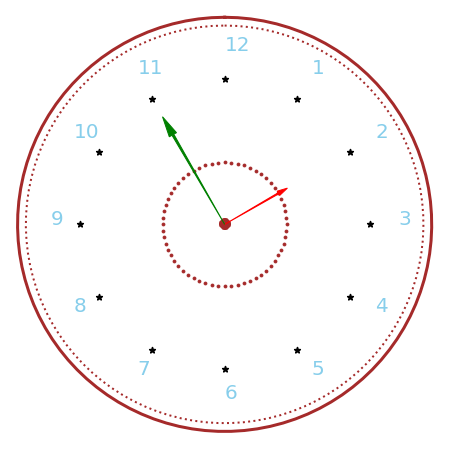

In [5]:

def draw_clock(angle_hour, angle_minute):
    '''
     It takes 2 input arguments, corresponding to the two angles of the clock hands, 
     and draw a clock with the precise location of both hands.
     input:
         angle_hour: the angle between hour hand and 12 position
         angle_minute: the angle between minute hand and 12 position
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    
    ## creat the figure
    fig = plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True) # we draw the clock in a polar axis
    ax.set_theta_zero_location("N") # we start 0 degree from the north direction
    
    ## creat elements on the clock
    # plot the edge of the clock using ax.plot
    ax.plot(np.linspace(0, 2*np.pi, 100), np.array(([1] * 100)), color="brown", linewidth=3)
    ax.plot(np.linspace(0, 2*np.pi, 100), np.array(([0.96] * 100)), color="brown", linestyle=":", linewidth=2)
    # plot the time slots on the clock using  ax.scatter
    r = np.array(([0.3] * 60))
    r2 = np.array(([0.7] * 12))
    theta = np.array([i * np.pi/30 for i in range(60)])
    theta2 = np.array([i * np.pi/6 for i in range(12)])
    ax.scatter(theta, r, color="brown", marker=".", linewidth=0.8)
    ax.scatter(theta2, r2, color="black", marker='*', linewidth=1.5)
    ax.scatter(0, 0, color="brown", marker="P", linewidth=6)
    
    ## plot labels on clock
    ax.set_theta_direction(-1) # set the direction go clockwise
    labels = ['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
    # add the label to every time slot
    for i in range(12):
        ax.annotate(labels[i], (theta2[i], r2[i]), xytext=(theta2[i], r2[i]+0.14), fontsize=20,color="skyblue")
    
    ## add hour and minute hands
    # add hour hand
    ax.arrow(angle_hour, 0, 0, 0.3, width=0.02, head_width=0.08, head_length=0.05, fc='r', ec='r')
    # add minute hand
    ax.arrow(angle_minute, 0, 0, 0.5, width=0.02, head_width=0.08, head_length=0.1, fc='g', ec='g')
    
    ax.axis("off")
    plt.show()

### test
draw_clock(np.pi/3, 11*np.pi/6)


---
## Task 5: Analog to digital conversion [5 marks]

🚩 Write a function `analog_to_digital(angle_hour, angle_minute)` that takes two input arguments, corresponding to the angles formed by each hand with 12 o'clock, and returns the time in digital format. More specifically, the output is a string showing the time in hour and minute in the format `hh:mm`, where `hh` is the hour and `mm` is the minute.

- When the hour is smaller than 10, add a leading zero (e.g. `04:30`).
- When the hour is zero, display `12`.

At this point, your function is not concerned about the imprecision. It should calculate the hour from the hour hand, and the minute from the minute hand, separately.

---
✅ *Testing:* the same angles as in Task 4 should give you `02:55`.

In [6]:

def analog_to_digital(angle_hour, angle_minute):
    '''
    It takes angles formed by hour and minute hands with 12 o'clock, 
    and returns the time in digital format.
    Input: 
        angle_hour: the angle between hour hand and 12 position
        angle_minute: the angle between minute hand and 12 position
    '''
    import numpy as np
    ## calculate the hour value using angle_hand
    # if angle_hour/(2*np.pi)*12 is between (a,a+1), we take a
    hour = int(np.floor(angle_hour / (2*np.pi) * 12))
    if hour == 0: # if hour is 0, we replace it with 12
        hour = "12"
    if hour < 10: # if hour < 10, we add a leading 0
        hour = "0" + str(hour)
    else:
        hour = str(hour) # convert number to string
    
    ## calculate the minute value using angle_minute
    # if angle_minute/(2*np.pi)*60 is between (a,a+1), we take a
    minute = int(np.floor(angle_minute / (2*np.pi) * 60))
    if minute < 10: # if hour < 10, we add a leading 0
        minute = "0" + str(minute)
    else:
        minute = str(minute) # convert number to string
        
    ## calculate time
    time = hour + ":" + minute
    return time

### test
analog_to_digital(np.pi/3, 11*np.pi/6) 
        

'02:55'

---
## Task 6: Find the misalignment [5 marks]

Now that you have extracted useful information from the pictures, you need to check if the two hands are aligned properly. To do so, you will need to find the exact time that the **small hand** is showing, in hours and minutes. Then, compare with the minutes that the big hand is showing, and report the difference.

Note that the misalignment will never be more than 30 minutes. For example, if you read a 45-minute difference between the minutes indicated by the hour hand and by the minute hand, you can realign the minute hand by 15 minutes in the other direction instead.

---

🚩 Write a function `check_alignment(angle_hour, angle_minute)` which returns the misalignment in minutes.

Make sure you structure you code sensibly. You may wish to use some intermediate functions to do the sub-tasks.

---
✅ *Testing:* the same angles as in Task 4 should give you a 5-minute misalignment.

In [7]:

def check_alignment(angle_hour, angle_minute):
    '''
    It check whether the hour and minute hands are aligned properly.
    Input: 
        angle_hour: the angle between hour hand and 12 position
        angle_minute: the angle between minute hand and 12 position
    '''
    import numpy as np
    
    ## get the hour indicated by angle_hour and minute indicated by angle_minute
    ## using analog_to_digital we defined before
    time = analog_to_digital(angle_hour, angle_minute)
    hour = int(time[:2]) # get the hour
    minute = int(time[-2:]) # get the minute
    
    ## get the minute indicated by angle_hour
    if hour == 12: # change 12 to 0, because 2*pi is not included in our model
        hour = 0
    exceed_degree = angle_hour - hour * np.pi/6 # the degree that exceeds the hour tick
    minute_2 = (exceed_degree / (np.pi/6)) * 60 # the minute indicated by angle_hour
    
    ## calculate the difference
    minute_diff = int(abs(minute - minute_2))
    # misalignment will be less than or equal to 30 minutes
    if minute_diff > 30:
        minute_diff = 60 - minute_diff
    
    return minute_diff

### test
print(check_alignment(np.pi/3, 11*np.pi/6))
    
    
    

5


---
## Task 7: Putting it all together [6 marks]

Now that you have successfully broken down the problem into a sequence of sub-tasks, you need to combine all the above steps in one function.

🚩 Write a function `validate_clock(filename)` that takes the name of an image file (a picture of a clock face) as an input argument, and returns the misalignment in minutes as an integer.

Then, write a function `validate_batch(path, tolerance)` which takes 2 input arguments: `path`, a string to indicate the path of a folder containing a batch of clock pictures, and `tolerance`, a positive integer representing the maximum tolerable number of minutes of misalignment for a clock to pass the quality control check.

Your `validate_batch()` function should write a .txt file called `batch_X_QC.txt` (where `X` should be replaced by the batch number), containing the following information:

```
Batch number: [X]
Checked on [date and time]

Total number of clocks: [X]
Number of clocks passing quality control ([X]-minute tolerance): [X]
Batch quality: [X]%

Clocks to send back for readjustment:
clock_[X]   [X]min
clock_[X]   [X]min
clock_[X]   [X]min
[etc.]
```

The square brackets indicate information which you need to fill in.

- You will need to check all pictures in the given folder. You may wish to use Python's `os` module.
- The date and time should be the exact date and time at which you performed the validation, in the format `YYYY-MM-DD, hh:mm:ss`. You may wish to use Python's `datetime` module.
- The batch quality is the percentage of clocks which passed the quality control in the batch, rounded to 1 decimal place. For example, in a batch of 20 clocks, if 15 passed the control and 5 failed, the batch quality is `75.0%`.
- List all clock numbers which should be sent back for realignment, in **decreasing order of misalignment**. That is, the most misaligned clock should appear first.
- The list of clocks to send back and the misalignment in minutes should be vertically aligned, in a way which makes the report easy to read. Check the example in the `testing` folder.
- Your function should not return anything, simply write the .txt report.

For instance, to use your function to check batch 1 with a 2-minute maximum acceptable misalignment, the command will be `validate_batch('clock_images/batch_1', 2)`.

---

✅ *Testing:* There is an example report in the `testing` folder (for a batch which you do not have), to check that your report is formatted correctly.

---

🚩 Use your function `validate_batch()` to generate quality control reports for the 5 batches of clocks provided in the `clock_images` folder, with a tolerance of 3 minutes.

Your reports should all be saved in a folder called `QC_reports`, which you should create using Python. You should generate all 5 reports and include them in your submission.


In [12]:

def validate_clock(filename):
    '''
    It takes the name of an image file, and returns the misalignment in minutes as an integer.
    Input:
        filename: the picture name of a clock face
    '''
    ## get the coordinates of hour hand and minute hand
    hour_hand, minute_hand = get_clock_hands(filename)
    ## get the angles of hour hand and minute hand
    angle_hour = get_angle(hour_hand)
    angle_minute = get_angle(minute_hand)
    ## get misalignment
    misalignment = check_alignment(angle_hour, angle_minute)
    return misalignment
    
        
def validate_batch(path, tolerance):
    '''
    It checks quality of clocks.
    Input:
        path: a string to indicate the path of a folder containing a batch of clock pictures
            e.g. "clock_images/batch_1"
        tolerance: a positive integer representing the maximum tolerable number of minutes of misalignment 
        for a clock to passs the quality control check
    '''
    import os
    import datetime
    import matplotlib.pyplot as plt
        
    ## go through every picture
    picture_path = [] # creat a list to store picture paths
    clocks = [] # creat a list to store clock numbers
    # go through all pictures under specific path
    for fpath, dirname, fnames in os.walk(path):
        for f in fnames:
            picture_path.append(path+"/"+f) # store picture paths
            clocks.append(f.split(".")[0]) # store picture clock numbers, e.g. "clock_1"
    
    ## check every clock
    bad_clocks = [] # creat a list to store clocks that needs to be sent back for readjustment
    bad_misalignments = [] # creat a list to store corresponding misalignments of bad_clock
    for p in range(len(clocks)):
        misalignment = validate_clock(plt.imread(picture_path[p]))
        if misalignment > tolerance:
            bad_clocks.append(clocks[p]) # store bad clocks
            bad_misalignments.append(misalignment) # store bad misalignments
        
    ## get the other output elements
    time = datetime.datetime.now().strftime("%Y/%m/%d, %H:%M:%S") # the time
    batch = path.split("/")[-1]
    batch_num = batch.split("_")[-1] # the batch number
    clocks_num = len(clocks) # the total number of clocks
    bad_clocks_num = len(bad_clocks) # number of clocks that does not pass quality control
    good_clocks_num = clocks_num - bad_clocks_num # number of clocks passing quality control
    batch_quality = round(100 * good_clocks_num / clocks_num, 1) # the Batch quality, %
    
    ## output  batch_X_QC.txt
    batch
    store_path = f"QC_reports/batch_{batch_num}_QC.txt"
    with open (store_path, 'w') as myflie:
        myflie.write(f"Batch number: {batch_num}\n")
        myflie.write(f"Checked on {time}\n")
        myflie.write("\n")
        myflie.write(f"Total number of clocks: {clocks_num}\n")
        myflie.write(f"Number of clocks passing quality control ({tolerance}-minute tolerance): {good_clocks_num}\n")
        myflie.write(f"Batch quality: {batch_quality}%\n")
        myflie.write("\n")
        myflie.write("Clocks to send back for readjustment:\n")
        for i in range(bad_clocks_num):
            myflie.writelines(f"{bad_clocks[i]}    {bad_misalignments[i]: >2}min\n")
            
    
    
validate_batch("clock_images/batch_4", 3)
    
    

    

d:\py\python396\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\py\python396\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\py\python396\lib\site-packages\scipy\stats\_stats_mstats_common.py:194: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
